rdkit uses a special case of Tversky similarity for count-based Tanimoto similarity under the hood:
https://www.rdkit.org/docs/cppapi/SparseIntVect_8h_source.html#l00571

I wasn't sure if that implementation results the same as the Ruzicka similarity I already calculated like this:
```python
def ruzicka_similarity(A, B):
    min_sum = np.sum(np.minimum(A, B))
    max_sum = np.sum(np.maximum(A, B))
    
    return min_sum / max_sum
```

But this notebook shows that it is.

<class 'rdkit.DataStructs.cDataStructs.UIntSparseIntVect'>


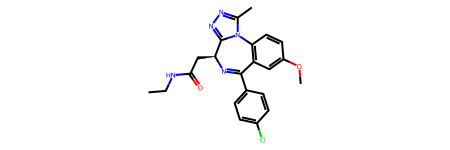

In [6]:
from rdkit import DataStructs
from rdkit.Chem import rdFingerprintGenerator, SmilesMolSupplier

supplier = SmilesMolSupplier('../data/datasets/compounds_ms2structures.csv', delimiter=',', titleLine=True, smilesColumn=1, nameColumn=0)
fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=9, fpSize=4096)

ref_mol = next(supplier)
ref_fp = fpgen.GetCountFingerprint(ref_mol)
print(type(ref_fp))
ref_mol

In [7]:
from itertools import islice

other_fps = [fpgen.GetCountFingerprint(mol) for mol in supplier]
tanimoto_similarities = DataStructs.BulkTanimotoSimilarity(ref_fp, other_fps)
tanimoto_similarities

[1.0,
 0.14035087719298245,
 0.05179282868525897,
 0.11848341232227488,
 0.1261682242990654,
 0.07653061224489796,
 0.10612244897959183,
 0.043209876543209874,
 0.05952380952380952,
 0.024691358024691357,
 0.11070110701107011,
 0.1330049261083744,
 0.041407867494824016,
 0.12206572769953052,
 0.075,
 0.10849056603773585,
 0.05913978494623656,
 0.17894736842105263,
 0.11627906976744186,
 0.09863945578231292,
 0.0330188679245283,
 0.047058823529411764,
 0.1125,
 0.10238907849829351,
 0.1519434628975265,
 0.05905511811023622,
 0.06748466257668712,
 0.09565217391304348,
 0.043795620437956206,
 0.09401709401709402,
 0.07291666666666667,
 0.116,
 0.03566121842496285,
 0.10384615384615385,
 0.050314465408805034,
 0.06437768240343347,
 0.12653061224489795,
 0.08641975308641975,
 0.1038961038961039,
 0.13122171945701358,
 0.07657657657657657,
 0.10588235294117647,
 0.09718670076726342,
 0.18716577540106952,
 0.033816425120772944,
 0.12861736334405144,
 0.08982035928143713,
 0.07894736842105263,

In [11]:
import os
import numpy as np

sim_matrix_file = os.path.join("..", "data", "group_similarity", f"compounds_ms2structures_ruzicka_similarities_morgan9_4096bits.npy")
sim_matrix = np.load(sim_matrix_file, mmap_mode ='r')
sim_matrix.shape

(37811, 37811)

In [12]:
ruzicka_similarities = sim_matrix[0]
ruzicka_similarities

memmap([1.        , 0.14035088, 0.05179283, ..., 0.13265306, 0.09448819,
        0.06993007], dtype=float32)

In [13]:
discrepancy_found = False
for i, tanimoto in enumerate(tanimoto_similarities):
    if not np.isclose(tanimoto, ruzicka_similarities[i]):
        print(f"Discrepancy at index {i}: {tanimoto - ruzicka_similarities[i]}\n Tanimoto = {tanimoto}, Ruzicka = {ruzicka_similarities[i]}")
        discrepancy_found = True

if not discrepancy_found:
    print("No discrepancies found between rdkits count-based Tanimoto and Ruzicka similarities.")

No discrepancies found between rdkits count-based Tanimoto and Ruzicka similarities.
